In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

In [81]:
train_value = pd.read_csv('train_values.csv')
df_test = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')


In [82]:
train_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [83]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [84]:
# convert_features = ["land_surface_condition","foundation_type", "roof_type", "ground_floor_type", "other_floor_type","position", "plan_configuration", "legal_ownership_status"]
# def convert(df,features):
#   for feature in features:
#     df[feature] = df[feature].astype("category")
# convert(df_train,convert_features)
# convert(df_test,convert_features)

## **Kiểu dữ liệu**

In [85]:
train_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [86]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [87]:
train_value.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Missing Values**

In [88]:
train_value.isnull().sum() 

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [89]:
train_labels.isnull().sum() 

building_id     0
damage_grade    0
dtype: int64

In [90]:
df_test.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Dữ liệu khá clean

## **Phân tích dữ liệu**

In [91]:
train_value= train_value.merge(train_labels, on='building_id')

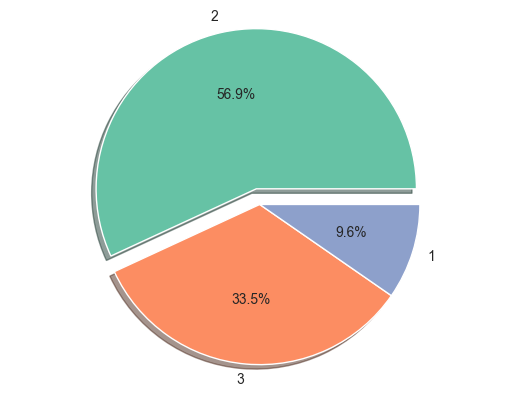

In [92]:
percent = list(train_value['damage_grade'].value_counts()/len(train_value['damage_grade'])*100)
label = list(train_value['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

Có thể dễ dàng nhận thấy rằng tập dữ liệu rất mất cân bằng. Lý do khiến tập dữ liệu này mất cân bằng có thể là do dữ liệu được thu thập sau trận động đất ở Nepal năm 2015 và rất có thể mức độ thiệt hại của các tòa nhà có mối tương quan cao với cường độ của trận động đất.

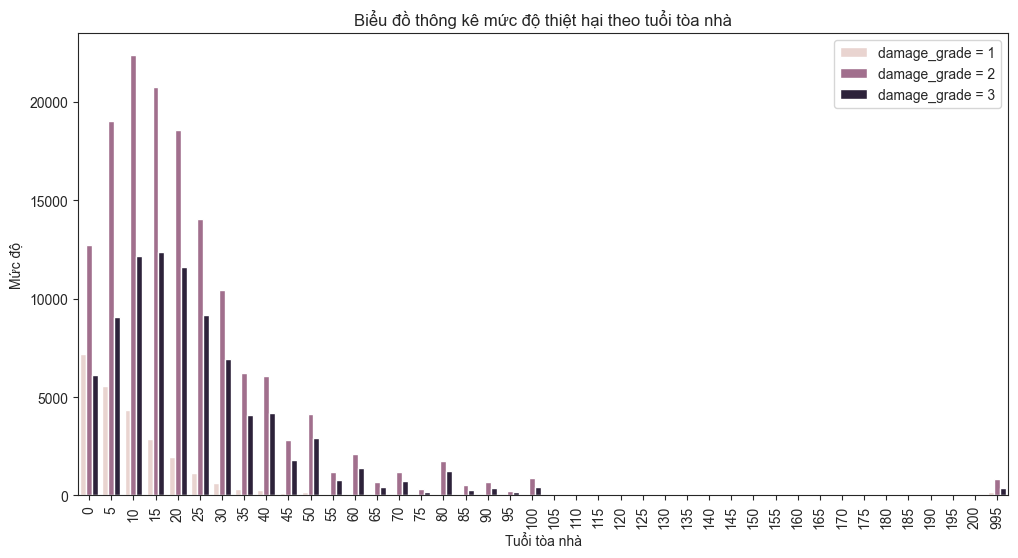

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_value["age"],hue=train_labels["damage_grade"])
plt.ylabel("Mức độ")
plt.xlabel("Tuổi tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo tuổi tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Ta có thể thấy rằng xuất hiện những tòa nhà 995 năm tuổi khá cũ, tuy nhiên từ khoảng 105-200 gần như không có số liệu, cho nên ta cần xử lí các ngoại lệ này, damage_grade 2 xuất hiện cao nhất ở những toà nhà dao động từ 5-20 tuổi

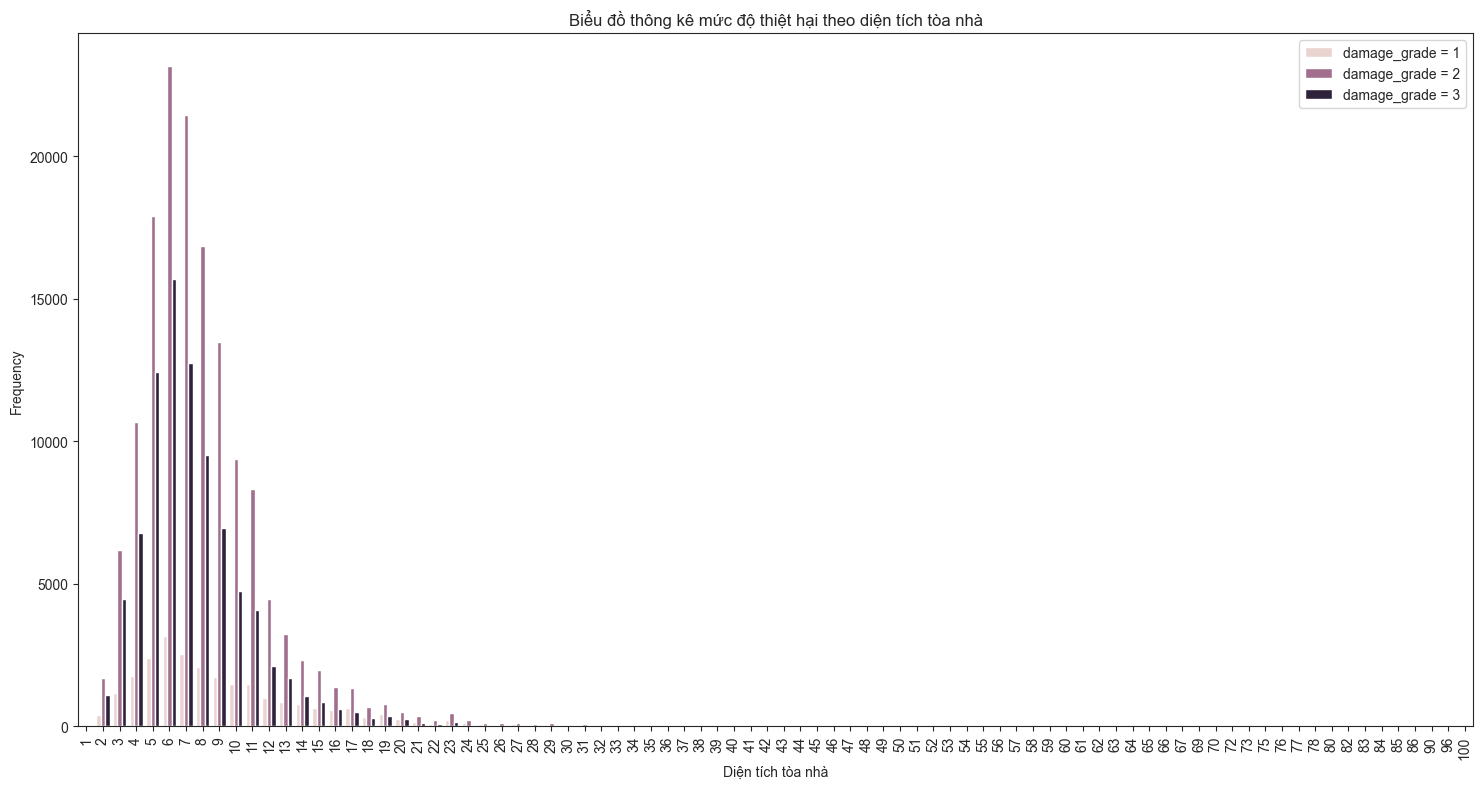

In [94]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_value["area_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Diện tích tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo diện tích tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Diện tích tiêu chuẩn của diện tích tòa nhà là dưới 20% đối với hầu hết các tòa nhà, cần ngoại lệ các con số từ 20 đổ lên

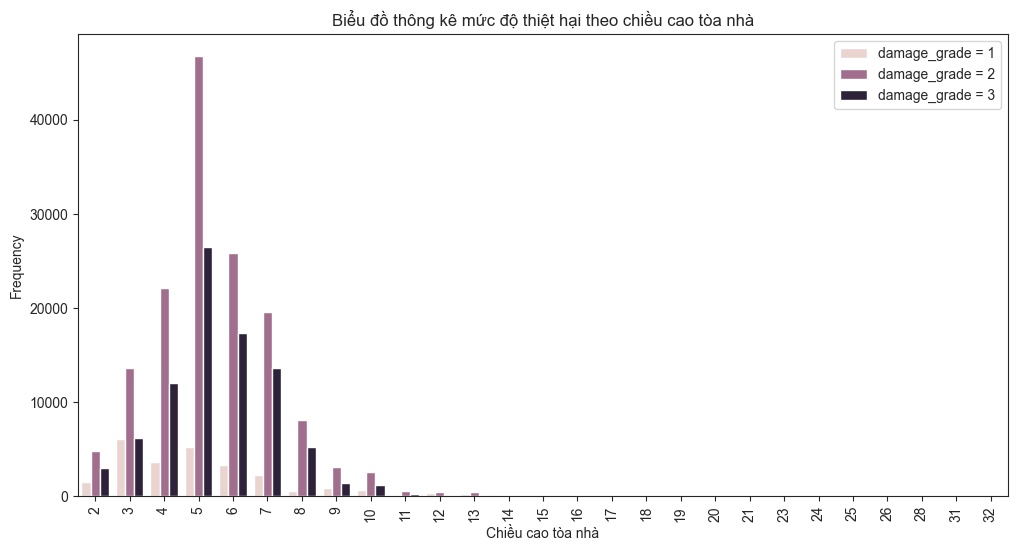

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_value["height_percentage"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Chiều cao tòa nhà")
plt.xticks(rotation=90)
plt.title("Biểu đồ thông kê mức độ thiệt hại theo chiều cao tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Hầu hết dữ liệu cho chiều cao tòa nhà nhỏ hơn 10% nhưng chỉ có một số ít tòa nhà có giá trị lên tới 32%.

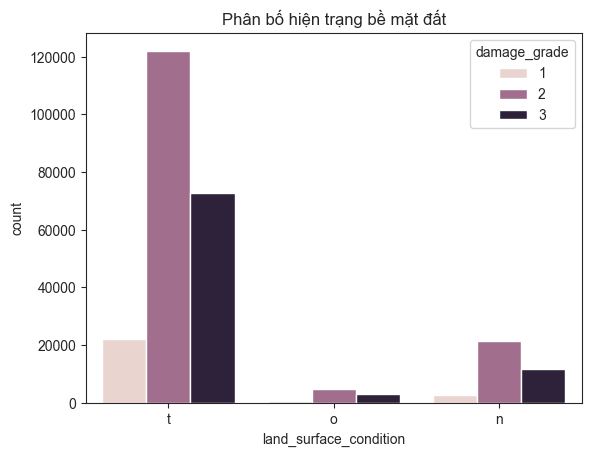

In [96]:
sns.countplot(x = train_value["land_surface_condition"], hue = train_labels["damage_grade"])
plt.title("Phân bố hiện trạng bề mặt đất")
plt.show()

Đây là một biến phân loại cho biết tình trạng bề mặt của đất nơi tòa nhà được xây dựng. Các giá trị có thể có: n, o, t.

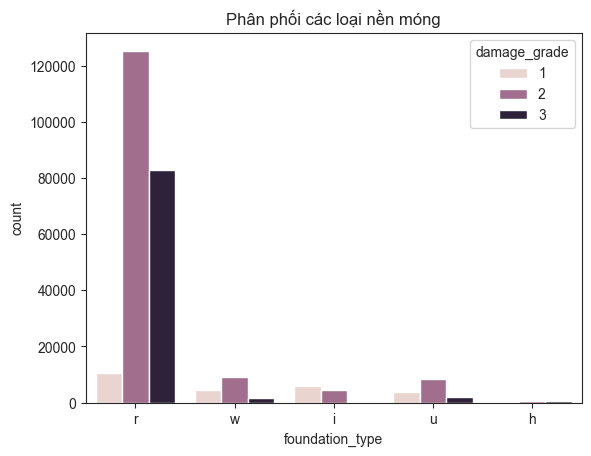

In [97]:
sns.countplot(x = train_value["foundation_type"], hue = train_labels["damage_grade"])
plt.title("Phân phối các loại nền móng")
plt.show()

Đây là một biến phân loại cho biết loại nền móng được sử dụng khi xây dựng. Các giá trị có thể có: h, i, r, u, w.

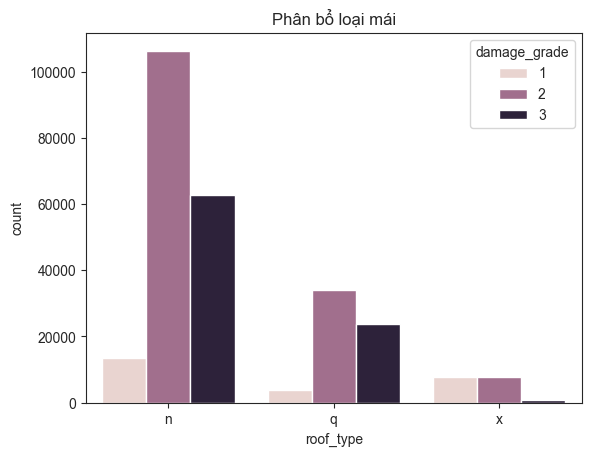

In [98]:
sns.countplot(x = train_value["roof_type"], hue = train_labels["damage_grade"])
plt.title("Phân bổ loại mái")
plt.show()

Đây là một biến phân loại cho biết loại mái được sử dụng khi xây dựng. Các giá trị có thể có: n, q, x

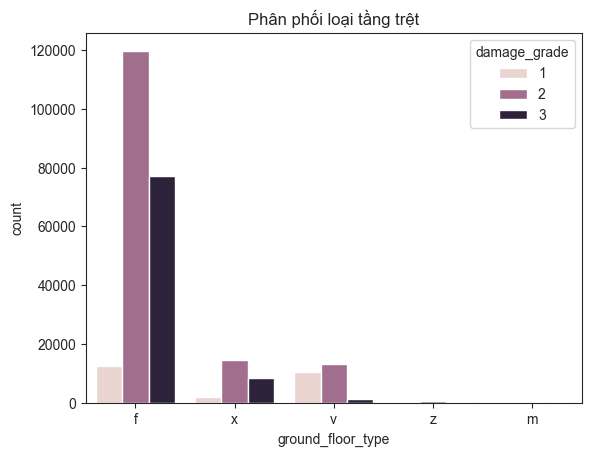

In [99]:
sns.countplot(x = train_value["ground_floor_type"], hue = train_labels["damage_grade"])
plt.title("Phân phối loại tầng trệt")
plt.show()

Đây là một biến phân loại cho biết loại tầng trệt. Các giá trị có thể có: f, m, v, x, z.

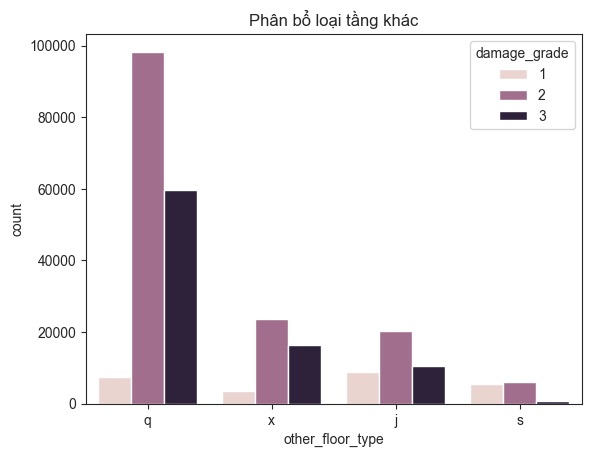

In [100]:
sns.countplot(x = train_value["other_floor_type"], hue = train_labels["damage_grade"])
plt.title("Phân bổ loại tầng khác")
plt.show()

Đây là một biến phân loại cho biết loại công trình được sử dụng ở tầng cao hơn tầng trệt (trừ mái nhà). Các giá trị có thể có: j, q, s, x.

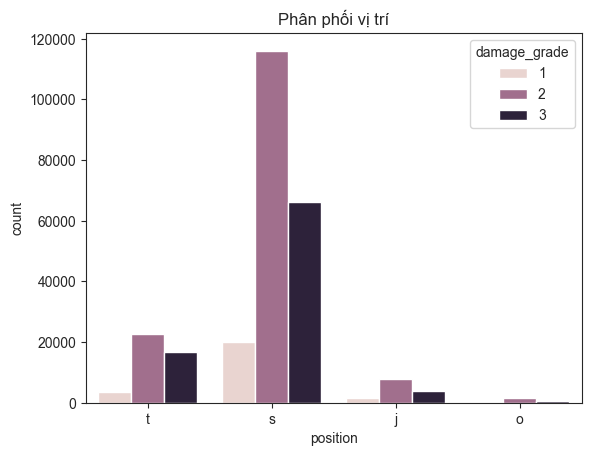

In [101]:
sns.countplot(x = train_value["position"], hue = train_labels["damage_grade"])
plt.title("Phân phối vị trí")
plt.show()

Đây là một biến phân loại cho biết vị trí của tòa nhà. Các giá trị có thể có: j, o, s, t.

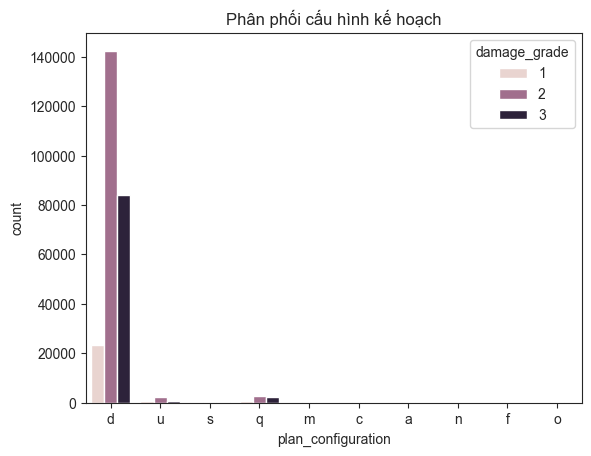

In [102]:
sns.countplot(x = train_value["plan_configuration"], hue = train_labels["damage_grade"])
plt.title("Phân phối cấu hình kế hoạch")
plt.show()

Đây là một biến phân loại cho biết cấu hình kế hoạch xây dựng. Các giá trị có thể có: a, c, d, f, m, n, o, q, s, u.

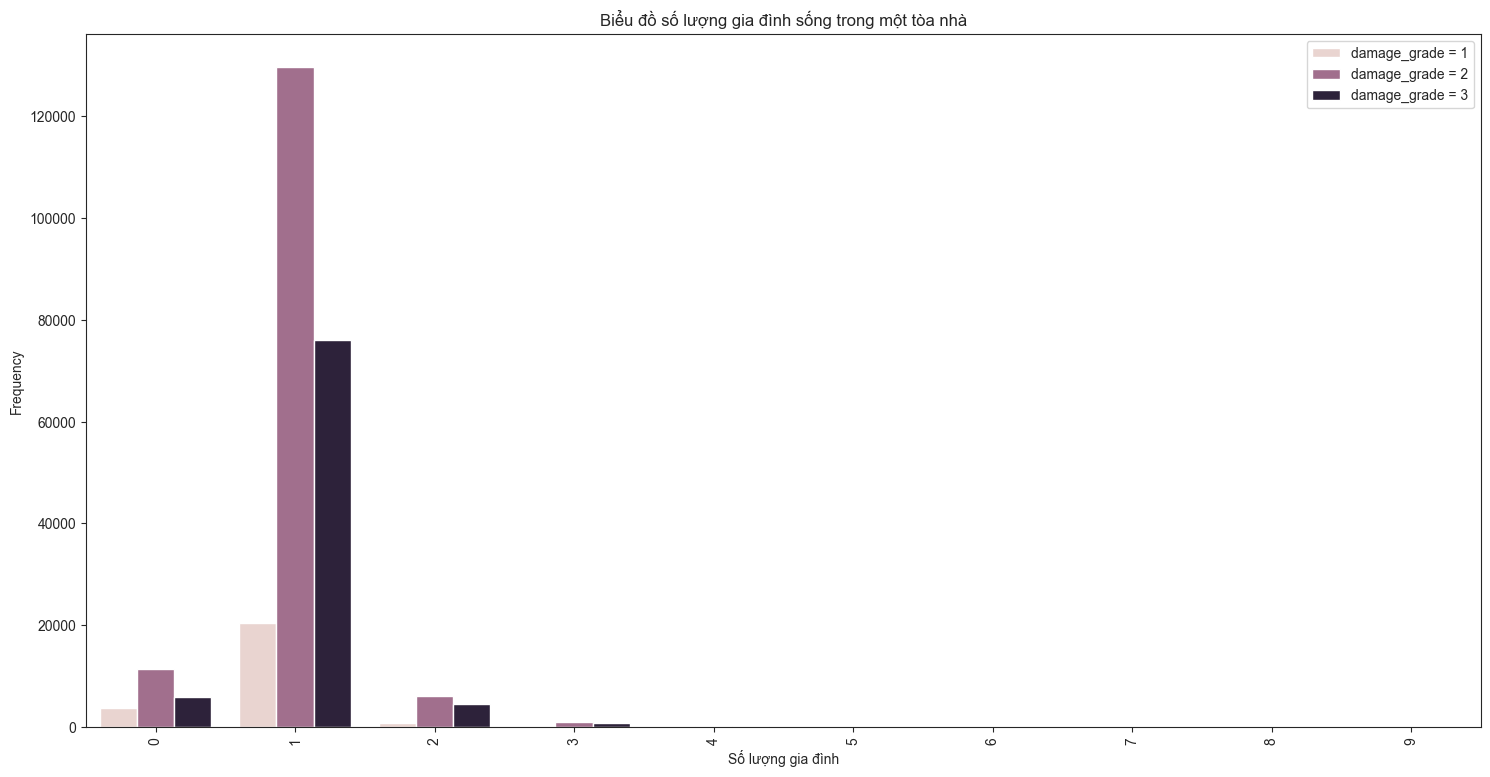

In [103]:
plt.figure(figsize=(18,9))
sns.countplot(x=train_value["count_families"],hue=train_labels["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Số lượng gia đình")
plt.xticks(rotation=90)
plt.title("Biểu đồ số lượng gia đình sống trong một tòa nhà")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

Hầu hết các tòa nhà chỉ có 1 gia đình sống trong đó. Chúng tôi cũng có những tòa nhà có tới 9 gia đình đang sinh sống, những tòa nhà này có thể giống như những tòa nhà 9 tầng.

## **Ngoại lệ**


Random Forest là một mô hình học máy dựa trên cây quyết định (decision tree), được cho là hoạt động mạnh mẽ ngay cả khi dữ liệu chứa các giá trị ngoại lệ. Tuy nhiên, đây là quan niệm sai lầm phổ biến...

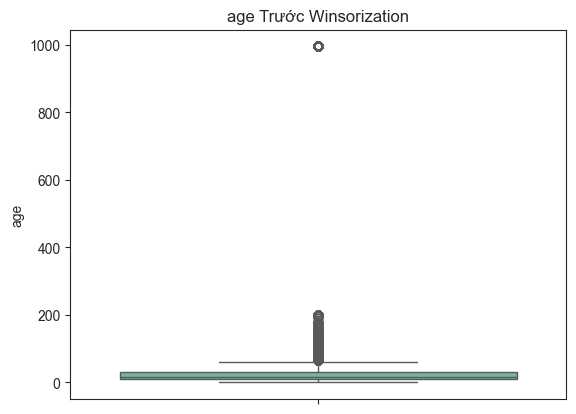

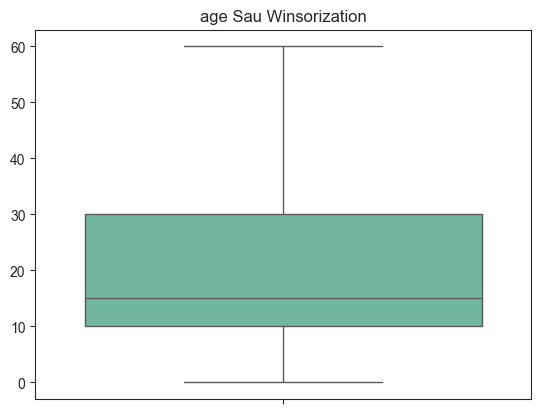

In [104]:
#Data source
name = "age"
data = train_value[name]

#Trước winsorization
sns.boxplot(data)
plt.title("{} Trước Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#Sau winsorization
sns.boxplot(winsorized_data)
plt.title("{} Sau Winsorization".format(name))
plt.show()

#Thay thế data trong dataset
train_value[name] = winsorized_data

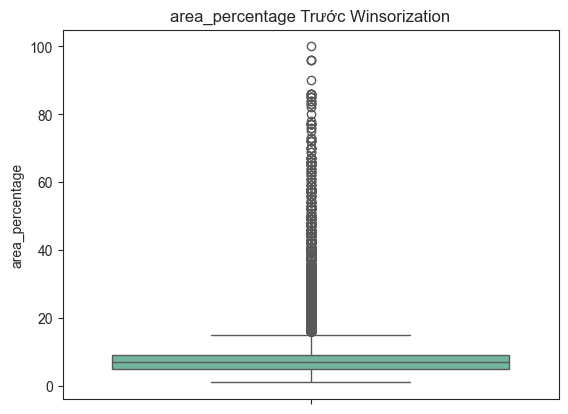

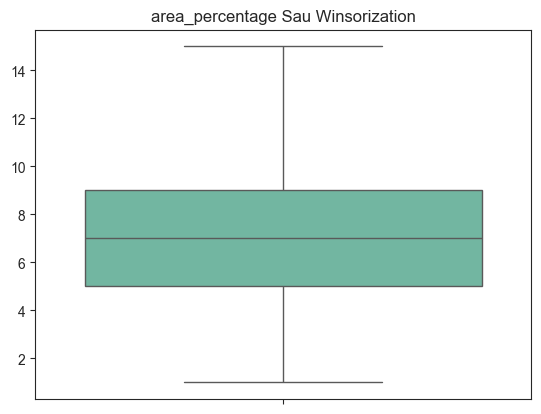

In [105]:
#Data source
name = "area_percentage"
data = train_value[name]

#Trước winsorization
sns.boxplot(data)
plt.title("{} Trước Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#Sau winsorization
sns.boxplot(winsorized_data)
plt.title("{} Sau Winsorization".format(name))
plt.show()

#Replace data in dataset
train_value[name] = winsorized_data

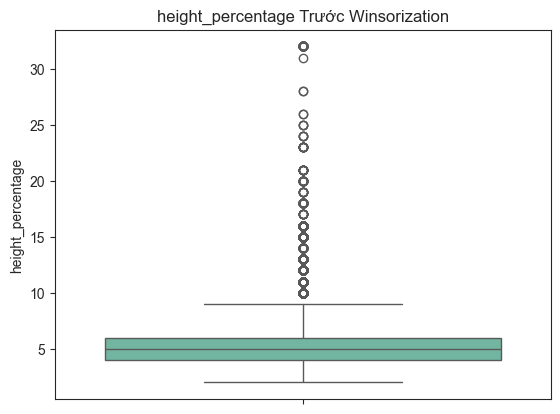

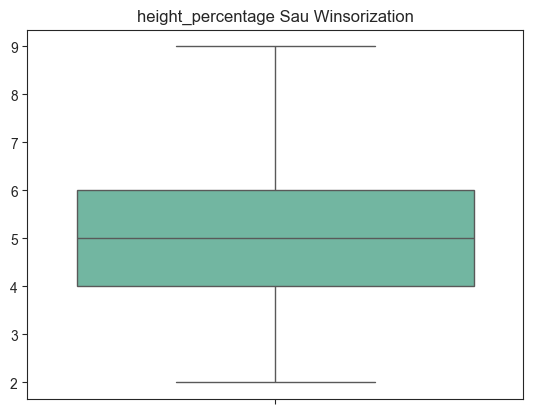

In [106]:
#Data source
name = "height_percentage"
data = train_value[name]

#Trước winsorization
sns.boxplot(data)
plt.title("{} Trước Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#Sau winsorization
sns.boxplot(winsorized_data)
plt.title("{} Sau Winsorization".format(name))
plt.show()

#Replace data in dataset
train_value[name] = winsorized_data

## **Sự tương quan**

In [107]:
train_value.drop(columns=["building_id"], inplace=True)
train_value.drop(columns=["damage_grade"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)

In [108]:
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [109]:
train_values = pd.get_dummies(train_value, drop_first = True)

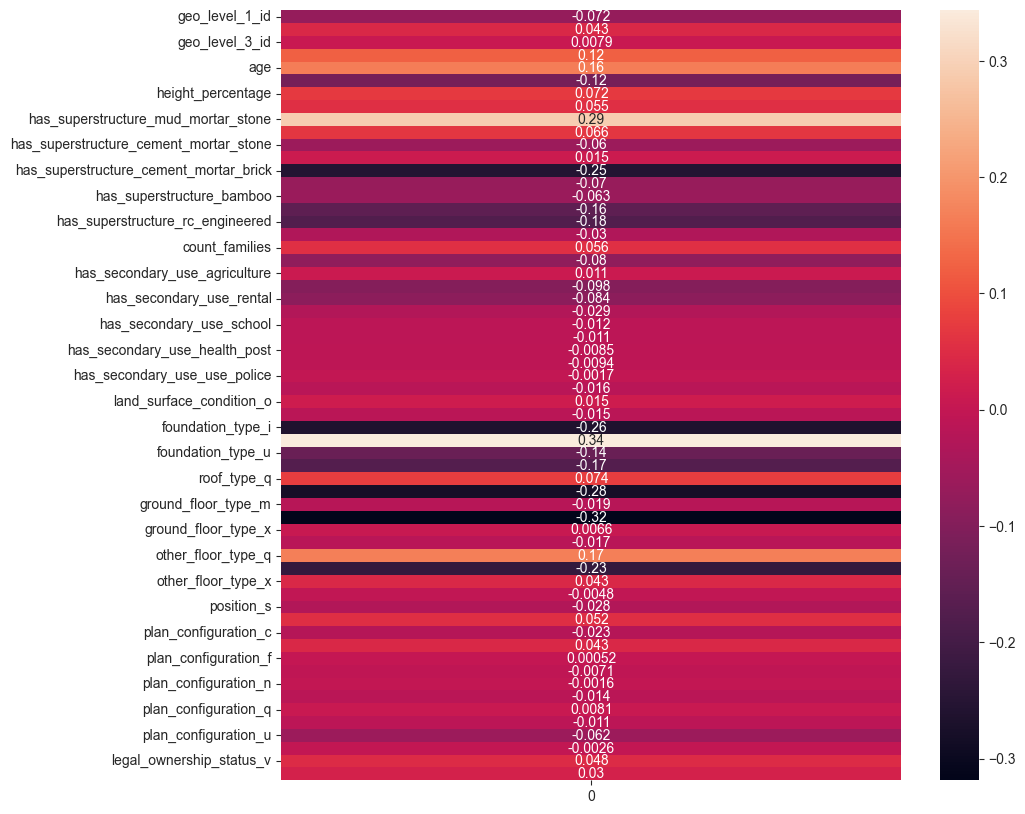

In [110]:
plt.figure(figsize=(10,10))
correlations = train_values.corrwith(train_labels["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()

## **Câu 2: Hồi quy tuyến tính**

In [111]:
X = train_values
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred).astype(int)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred_class)

print("Accuracy:", accuracy)

Accuracy: 0.5747587344832218


## Nhận xét
Để có thể đo accuracy, ta phải chuẩn hóa lại y_pred bằng cách làm tròn dữ liệu để so sánh nhãn

Sử dụng độ chính xác (accuracy) để đánh giá mô hình Linear Regression không phải là cách tiếp cận tốt nhất vì:

1. *Linear Regression là mô hình hồi quy*: Mục tiêu của nó là dự đoán một giá trị liên tục, không phải phân loại các đối tượng vào các lớp. Do đó, việc sử dụng độ chính xác, một chỉ số thường được sử dụng cho các mô hình phân loại, không phản ánh chính xác hiệu suất của mô hình hồi quy.

2. *Giá trị độ chính xác 0.5747587344832218 chỉ ra rằng*: Khi chuyển đổi kết quả dự đoán từ mô hình hồi quy thành các lớp bằng cách làm tròn, chỉ có khoảng 57% dự đoán được phân loại chính xác. Tuy nhiên, con số này không cung cấp thông tin về mức độ sai lệch của các dự đoán so với giá trị thực tế trong bối cảnh hồi quy.

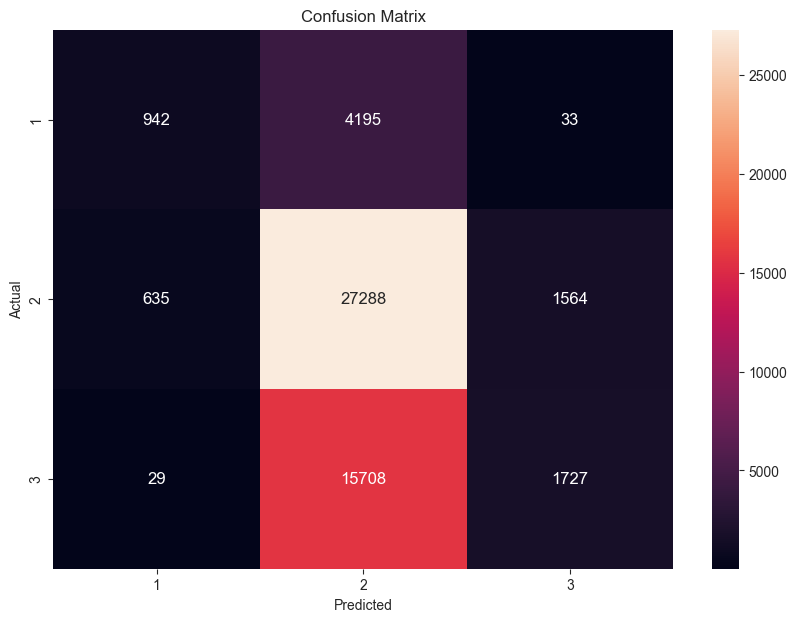

In [113]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, y_pred_class)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

## **Câu 3:**
### **a)**

In [114]:
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [115]:
from sklearn.preprocessing import LabelEncoder

def changeLabel(df):
    label_encoder = LabelEncoder()

    # Fit label encoder vào các nhãn
    label_encoder.fit(df["damage_grade"])

    # Biến đổi các nhãn
    df["damage_class"] = label_encoder.transform(df["damage_grade"])

changeLabel(train_labels)


In [116]:
train_labels.head()

,damage_grade,damage_class
0,3,2
1,2,1
2,3,2
3,2,1
4,3,2


In [117]:
train_labels.drop(columns=["damage_grade"], inplace=True)


In [118]:
from sklearn.model_selection import train_test_split

X = train_values
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
import time

# Tạo và huấn luyện mô hình Naïve Bayes
nb_model = GaussianNB()
# Đo thời gian chạy cho Naïve Bayes
start_time = time.time()
nb_model.fit(X_train, y_train)
nb_time = time.time() - start_time

print(f"Naïve Bayes Training Time: {nb_time} seconds")

# Dự đoán và đánh giá mô hình Naïve Bayes
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average="macro")
nb_recall = recall_score(y_test, nb_predictions, average="macro")

print(f"Naïve Bayes Accuracy: {nb_accuracy}")
print(f"Naïve Bayes Precision: {nb_precision}")
print(f"Naïve Bayes Recall: {nb_recall}")

Naïve Bayes Training Time: 0.6860580444335938 seconds
Naïve Bayes Accuracy: 0.43527560867980275
Naïve Bayes Precision: 0.5007960654944719
Naïve Bayes Recall: 0.530470751094987


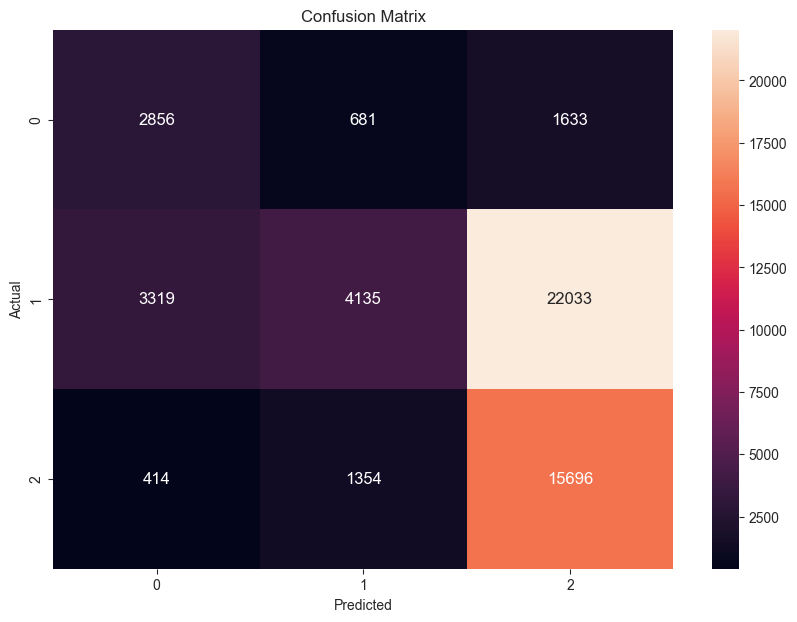

In [120]:
data = confusion_matrix(y_test, nb_predictions)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

In [121]:
# Tạo và huấn luyện mô hình Multinomial Logistic Regression
logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
start_time = time.time()
logistic_model.fit(X_train, y_train)
logistic_time = time.time() - start_time

print(f'Logistic Regression Training Time: {logistic_time} seconds')

# Dự đoán và đánh giá mô hình Logistic Regression
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
logistic_recall = recall_score(y_test, logistic_predictions, average='macro')

print(f'Multinomial Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Multinomial Logistic Regression Precision: {logistic_precision}')
print(f'Multinomial Logistic Regression Recall: {logistic_recall}')

Logistic Regression Training Time: 103.58686208724976 seconds
Multinomial Logistic Regression Accuracy: 0.5705953454461733
Multinomial Logistic Regression Precision: 0.5864482539030385
Multinomial Logistic Regression Recall: 0.3682071704736601


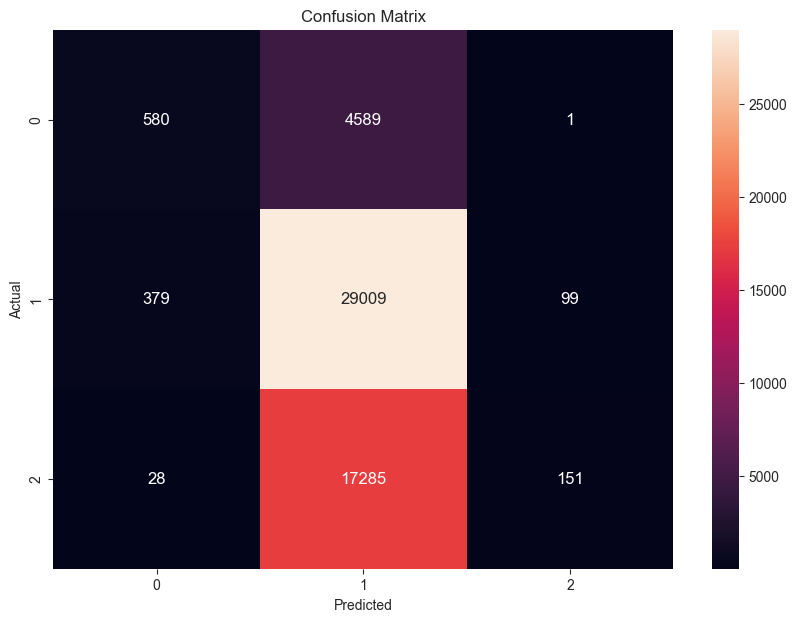

In [122]:
data = confusion_matrix(y_test, logistic_predictions)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()

Một cách tổng quan, ta có thể thấy:

• Cả hai mô hình đều cho thấy hiệu suất tương đối tốt trong việc phân loại dữ liệu, nhưng Multinomial Logistic Regression có vẻ hiệu quả hơn so với Naïve Bayes. Tuy nhiên cả hai mô hình chưa thực sự được tối ưu cao.

• Mô hình Multinomial Logistic Regression có độ chính xác trên tập validation là khoảng 57.1%, đồng nghĩa với việc mô hình đưa ra dự đoán chính xác cho khoảng hơn một nửa số lượng mẫu trong tập dữ liệu kiểm định. Trong khi đó, đọ chính xác trên tập validation của mô hình Naïve Bayes là khoảng 43.52%. Do đó, ta nhận thấy mô hình Multinomial Logistic Regression cho thấy một sự cải thiện đáng kể trong việc phân loại nhưng đồng thời cũng khiến thời gian chạy lâu hơn đáng kể.

• Sự cải thiện của mô hình Multinomial Logistic Regression có thể được giải thích bởi cách mà nó xử lý các dữ liệu số
học và tập dữ liệu lớn.

## **Câu 4:**

In [123]:
linear_regress_predictions = pd.DataFrame(y_pred_class, columns=['damage_grade'])


In [124]:
linear_regress_predictions.head()

,damage_grade
0,2
1,2
2,2
3,2
4,2


In [125]:
changeLabel(linear_regress_predictions)


In [126]:
linear_regress_predictions.drop(columns=["damage_grade"], inplace=True)


In [127]:
linear_regress_predictions.shape

(52121, 1)

In [128]:
logistic_predictions.shape

(52121,)

In [129]:
# So sánh giữa các mô hình
accuracy1 = accuracy_score(linear_regress_predictions, logistic_predictions)
accuracy2 = accuracy_score(linear_regress_predictions, nb_predictions)

In [130]:
accuracy1

0.9053356612497842

In [131]:
accuracy2

0.20897526908539743

Qua quan sát, ta có thể thấy:

• Mô hình Multinomial Logistic Regression có độ chính xác là 90.53%.

• Mô hình Naive Bayes có độ chính xác là chỉ 20.90%.

Điều này có nghĩa là mô hình Multinomial Logistic Regression có khả năng dự đoán đúng cao hơn đáng kể so với mô hình Naïve Bayes trên tập dữ liệu được sử dụng để đánh giá. Điều này có thể do sự phức tạp của mô hình, cũng như sự phù hợp của nó với cấu trúc của dữ liệu. Trong khi đó, mô hình Naïve Bayes dường như không hoạt động hiệu quả trên tập dữ liệu này.